In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/Credit Risk Detection/fraudTrain.csv', index_col=0)
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/Credit Risk Detection/fraudTest.csv', index_col=0)

In [ ]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# FEATURE ENGINEERING

**Classified the transaction time into Morning, Afternoon, Evening, Night**

In [ ]:
# Convert the trans_date_trans_time column to datetime
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])

# Create new columns for date and time
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour


# Drop the trans_date_trans_time column
df_train.drop(['trans_date_trans_time'], axis=1, inplace=True)
df_test.drop(['trans_date_trans_time'], axis=1, inplace=True)

df_train.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0


In [ ]:
def categorize_time(df_train):
  if df_train >= 0 and df_train <= 10:
    return 'morning'
  elif df_train == 24:
    return 'morning'
  elif df_train >= 11 and df_train <= 14:
    return 'afternoon'
  elif df_train >=15 and df_train <= 18:
    return 'evening'
  elif df_train >= 19 and df_train <= 23:
    return 'night'

df_train['transaction_time'] = df_train['hour'].apply(categorize_time)
df_test['transaction_time'] = df_test['hour'].apply(categorize_time)

In [ ]:
df_train.drop(['hour'], axis=1, inplace = True)
df_test.drop(['hour'], axis=1, inplace = True)

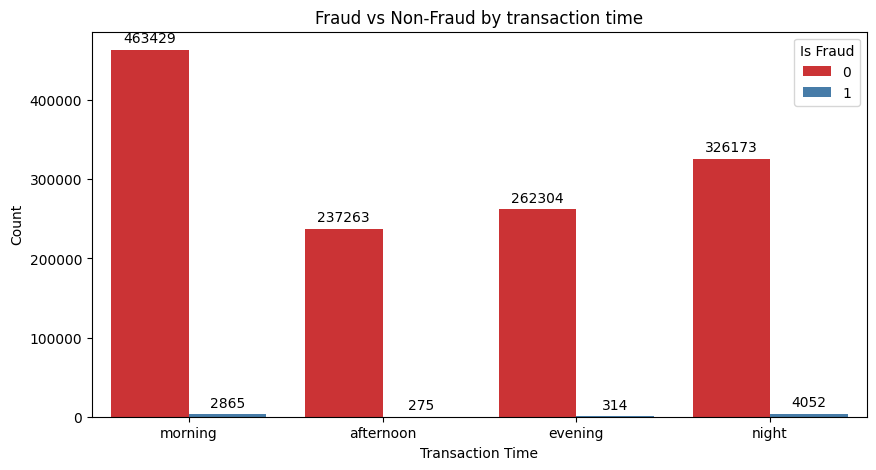

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_train, x='transaction_time', hue='is_fraud', palette='Set1')

for container in ax.containers:
  ax.bar_label(container, label_type='edge', padding=3)

plt.title('Fraud vs Non-Fraud by transaction time')
plt.xlabel('Transaction Time')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

**Classified the age**

In [ ]:
import datetime

def calculate_age(df_train):
    df_train = pd.to_datetime(df_train).date()

    today = datetime.date.today()

    age = (today-df_train)//datetime.timedelta(days=365.2425)

    return age

In [ ]:
df_train['age'] = df_train['dob'].apply(calculate_age)
df_test['age'] = df_test['dob'].apply(calculate_age)

In [ ]:
def categorize_age(df_train):
  if df_train >=18 and df_train <= 28:
    return '18-28'
  elif df_train >=29 and df_train <= 38:
    return '29-38'
  elif df_train >=39 and df_train <= 48:
    return '39-48'
  elif df_train >=49 and df_train <= 58:
    return '49-58'
  elif df_train >=59 and df_train <= 68:
    return '59-68'
  else:
    return '69+'

In [ ]:
df_train['age_category'] = df_train['age'].apply(categorize_age)
df_test['age_category'] = df_test['age'].apply(categorize_age)

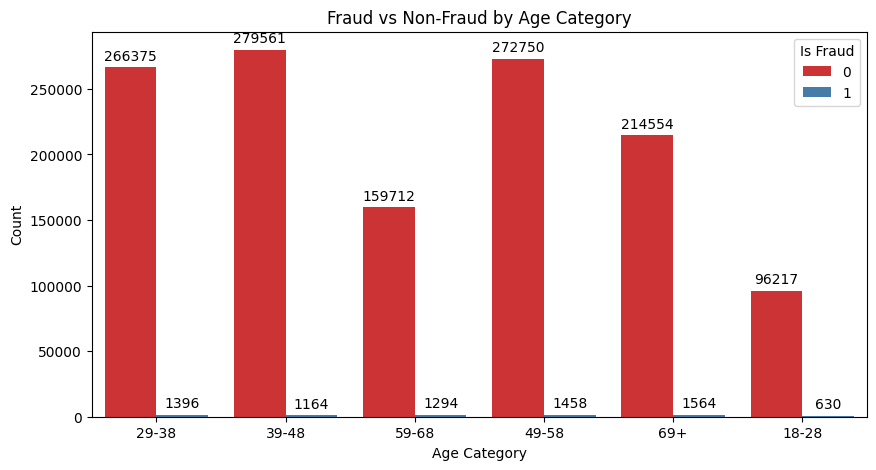

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_train, x='age_category', hue='is_fraud', palette='Set1')

for container in ax.containers:
  ax.bar_label(container, label_type='edge', padding=3)

plt.title('Fraud vs Non-Fraud by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

**Classified the amount of the transaction**

In [ ]:
max_transaction = df_train['amt'].max()
min_transaction = df_train['amt'].min()

mean_transaction = df_train['amt'].mean()
median_transaction = df_train['amt'].median()
std_transaction = df_train['amt'].std()

print('Max Transaction: ', max_transaction)
print('Min Transaction: ', min_transaction)
print('Mean Transaction: ', mean_transaction)
print('Median Transaction: ', median_transaction)
print('Standard Deviation Transaction: ', std_transaction)

Max Transaction:  28948.9
Min Transaction:  1.0
Mean Transaction:  70.35103545607033
Median Transaction:  47.52
Standard Deviation Transaction:  160.3160385715229


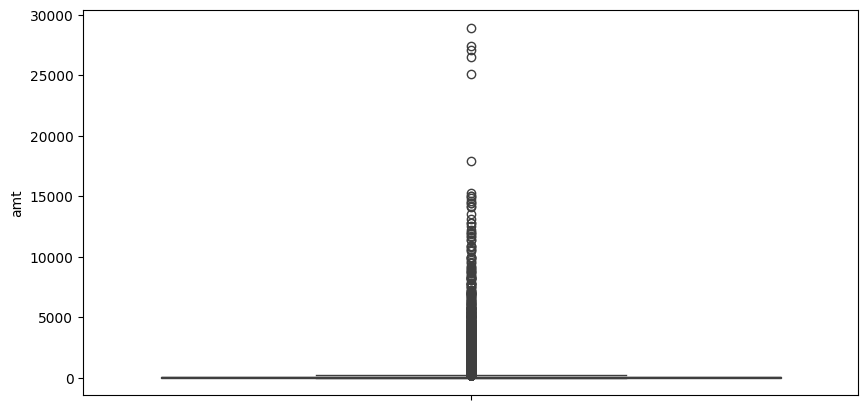

In [ ]:
#show outlier using box plot
fig = plt.figure(figsize=(10,5))
sns.boxplot(df_train['amt'])
plt.show()

In [ ]:
from scipy import stats


def remove_outliers(df, column_name, threshold=3):
    z_scores = stats.zscore(df[column_name])

    df_cleaned = df[np.abs(z_scores) < threshold]

    return df_cleaned

In [ ]:
df_train = remove_outliers(df_train, 'amt', threshold=3)
df_test = remove_outliers(df_test, 'amt', threshold=3)

In [ ]:
max_transaction = df_train['amt'].max()
min_transaction = df_train['amt'].min()
mean_transaction = df_train['amt'].mean()
median_transaction = df_train['amt'].median()
std_transaction = df_train['amt'].std()

print('Max Transaction: ', max_transaction)
print('Min Transaction: ', min_transaction)
print('Mean Transaction: ', mean_transaction)
print('Median Transaction: ', median_transaction)
print('Standard Deviation Transaction: ', std_transaction)

Max Transaction:  551.27
Min Transaction:  1.0
Mean Transaction:  60.49042534018415
Median Transaction:  46.84
Standard Deviation Transaction:  67.20911601114342


In [ ]:
def categorize_amount(df_train):
  if df_train >= 0 and df_train <= 49:
    return '0-49'
  elif df_train >= 50 and df_train <= 99:
    return '50-99'
  elif df_train >= 100 and df_train <= 149:
    return '100-149'
  elif df_train >= 150 and df_train <= 199:
    return '150-199'
  elif df_train >= 200 and df_train <= 249:
    return '200-249'
  elif df_train >= 250 and df_train <= 299:
    return '250-299'
  elif df_train >= 300 and df_train <= 349:
    return '300-349'
  elif df_train >= 350 and df_train <= 399:
    return '350-399'
  elif df_train >= 400 and df_train <= 449:
    return '400-449'
  elif df_train >= 450 and df_train <= 499:
    return '450-499'
  else:
    return '500+'

In [ ]:
df_train['amount_category'] = df_train['amt'].apply(categorize_amount)
df_test['amount_category'] = df_test['amt'].apply(categorize_amount)

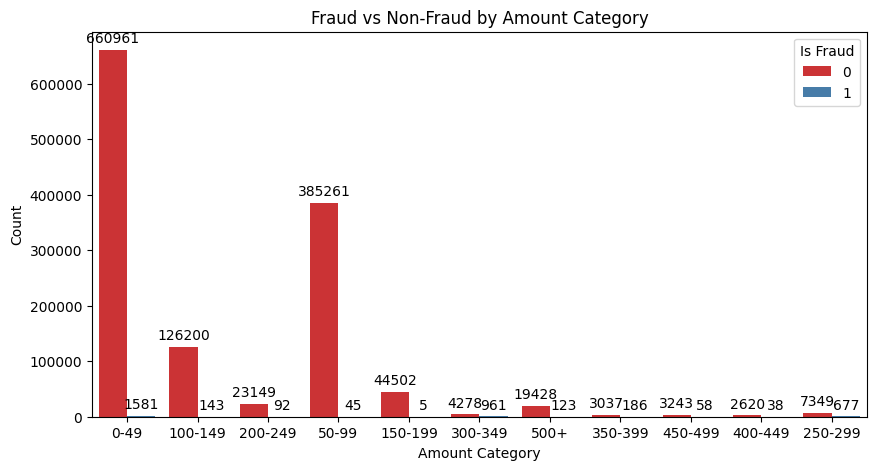

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_train, x='amount_category', hue='is_fraud', palette='Set1')

for container in ax.containers:
  ax.bar_label(container, label_type='edge', padding=3)

plt.title('Fraud vs Non-Fraud by Amount Category')
plt.xlabel('Amount Category')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

In [ ]:
df_train.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_time,age,age_category,amount_category
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,morning,36,29-38,0-49
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,morning,46,39-48,100-149
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,morning,62,59-68,200-249
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,morning,57,49-58,0-49
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,morning,38,29-38,0-49


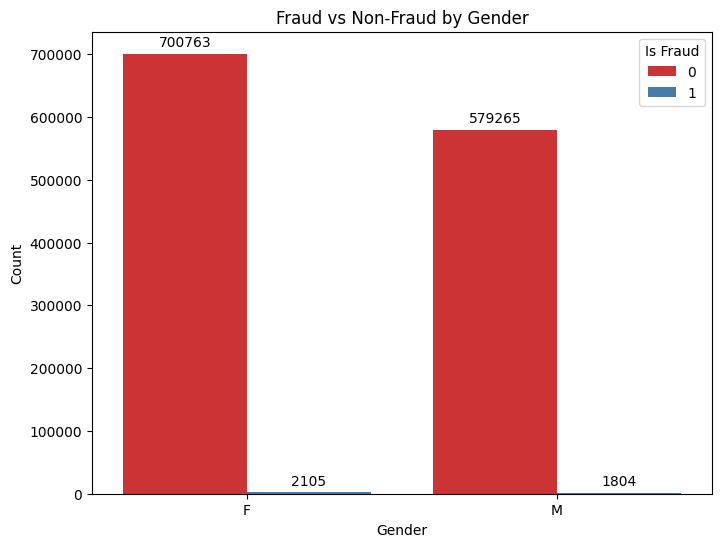

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_train, x='gender', hue='is_fraud', palette='Set1')

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

# Add labels and title
plt.title('Fraud vs Non-Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

In [ ]:
df_train['merchant'].nunique()

693

**Merged First Name and Last Name**

In [ ]:
df_train['name'] = df_train['first'] + ' ' + df_train['last']
df_test['name'] = df_test['first'] + ' ' + df_test['last']

In [ ]:
df_train.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_time,age,age_category,amount_category,name
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,morning,36,29-38,0-49,Jennifer Banks
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,morning,46,39-48,100-149,Stephanie Gill
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,morning,62,59-68,200-249,Edward Sanchez
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,morning,57,49-58,0-49,Jeremy White
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,morning,38,29-38,0-49,Tyler Garcia


**Drop unecessary Column**

In [ ]:
df_train.drop(['amt', 'first', 'last', 'dob', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long', 'age'], axis=1, inplace=True)
df_test.drop(['amt', 'first', 'last', 'dob', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long', 'age'], axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1283937 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   cc_num            1283937 non-null  int64 
 1   merchant          1283937 non-null  object
 2   category          1283937 non-null  object
 3   gender            1283937 non-null  object
 4   street            1283937 non-null  object
 5   city              1283937 non-null  object
 6   state             1283937 non-null  object
 7   zip               1283937 non-null  int64 
 8   city_pop          1283937 non-null  int64 
 9   job               1283937 non-null  object
 10  trans_num         1283937 non-null  object
 11  is_fraud          1283937 non-null  int64 
 12  transaction_time  1283937 non-null  object
 13  age_category      1283937 non-null  object
 14  amount_category   1283937 non-null  object
 15  name              1283937 non-null  object
dtypes: int64(4), object(12)

In [ ]:
df_train.head()

,cc_num,merchant,category,gender,street,city,state,zip,city_pop,job,trans_num,is_fraud,transaction_time,age_category,amount_category,name
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0,morning,29-38,0-49,Jennifer Banks
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,0,morning,39-48,100-149,Stephanie Gill
2,38859492057661,fraud_Lind-Buckridge,entertainment,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0,morning,59-68,200-249,Edward Sanchez
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,0,morning,49-58,0-49,Jeremy White
4,375534208663984,fraud_Keeling-Crist,misc_pos,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0,morning,29-38,0-49,Tyler Garcia


In [ ]:
#encode all string to int using label encoder
from sklearn.preprocessing import LabelEncoder

def encode_df(dataframe):
    le = LabelEncoder()
    for column in dataframe.columns:
      if dataframe[column].dtype == 'object':
        dataframe[column] = le.fit_transform(dataframe[column])
    return dataframe

encode_df(df_train)
encode_df(df_test)


In [ ]:
df_train.head()

,cc_num,merchant,category,gender,street,city,state,zip,city_pop,job,trans_num,is_fraud,transaction_time,age_category,amount_category,name
0,2703186189652095,514,8,0,568,526,27,28654,3495,370,55882,0,2,1,0,417
1,630423337322,241,4,0,435,612,47,99160,149,428,157791,0,2,2,1,869
2,38859492057661,390,0,1,602,468,13,83252,4154,307,810636,0,2,4,3,300
3,3534093764340240,360,2,1,930,84,26,59632,1939,328,539175,0,2,3,0,436
4,375534208663984,297,9,1,418,216,45,24433,99,116,822929,0,2,1,0,934


In [ ]:
df_test.head()

,cc_num,merchant,category,gender,street,city,state,zip,city_pop,job,trans_num,is_fraud,transaction_time,age_category,amount_category,name
0,2291163933867244,319,10,1,341,157,39,29209,333497,275,97737,0,0,3,0,377
1,3573030041201292,591,10,0,354,16,43,84002,302,392,107736,0,0,1,0,428
2,3598215285024754,611,5,0,865,61,33,11710,34496,259,429908,0,0,3,0,70
3,3591919803438423,222,9,1,320,764,8,32780,54767,407,71295,0,0,1,9,109
4,3526826139003047,292,13,1,548,247,21,49632,1126,196,188805,0,0,5,0,678


In [ ]:
X_data = df_train.drop(['is_fraud'], axis=1)
y_data = df_train['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

# Predictions from each model
y_pred_lr = lr.predict(X_val)
y_pred_dt = dt.predict(X_val)
y_pred_rf = rf.predict(X_val)


In [ ]:
# Print classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_lr))

Logistic Regression Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256029
           1       0.00      0.00      0.00       759

    accuracy                           1.00    256788
   macro avg       0.50      0.50      0.50    256788
weighted avg       0.99      1.00      1.00    256788



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_val, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256029
           1       0.47      0.53      0.50       759

    accuracy                           1.00    256788
   macro avg       0.73      0.76      0.75    256788
weighted avg       1.00      1.00      1.00    256788



In [ ]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256029
           1       0.94      0.45      0.61       759

    accuracy                           1.00    256788
   macro avg       0.97      0.72      0.80    256788
weighted avg       1.00      1.00      1.00    256788



In [ ]:
#predict in df_test
df_test.drop(['is_fraud'], axis=1, inplace=True)
y_pred_test = rf.predict(df_test)

In [ ]:
df_test['predicted_fraud'] = y_pred_test

In [ ]:
df_test.head(10)

,cc_num,merchant,category,gender,street,city,state,zip,city_pop,job,trans_num,transaction_time,age_category,amount_category,name,predicted_fraud
0,2291163933867244,319,10,1,341,157,39,29209,333497,275,97737,0,3,0,377,0
1,3573030041201292,591,10,0,354,16,43,84002,302,392,107736,0,1,0,428,0
2,3598215285024754,611,5,0,865,61,33,11710,34496,259,429908,0,3,0,70,0
3,3591919803438423,222,9,1,320,764,8,32780,54767,407,71295,0,1,9,109,0
4,3526826139003047,292,13,1,548,247,21,49632,1126,196,188805,0,5,0,678,0
5,30407675418785,126,7,0,727,90,33,14816,520,361,261449,0,1,0,218,0
6,213180742685905,526,5,0,9,117,4,95528,1139,455,49206,0,5,1,501,0
7,3589289942931264,500,10,0,340,725,40,57374,343,124,300516,0,3,0,703,0
8,3596357274378601,201,12,1,400,503,37,16858,3688,13,244198,0,3,0,226,0
9,3546897637165774,315,1,0,751,624,42,76678,263,41,359958,0,4,9,500,0


In [ ]:
df_test['predicted_fraud'].value_counts()

,count
predicted_fraud,
0,550138
1,466
